# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

Meu plano de solução será primeiramente importar todas as bibliotecas necessárias, abrir os arquivos recebidos para verificar se devo inserir parâmetros dentro de "pd.read_csv()" para fazer novamente uma leitura mais adequada dos arquivos. Em seguida, usarei métodos como .shape(), .describe(), .info(), .sample(), entre outros para averiguar as informações dos dataframes, como o tipo de cada coluna, quantidade de linha e colunas, nome das colunas e quantidade de não nulos.

In [1]:
# Importe as bibliotecas
import pandas as pd

In [2]:
# leia os conjuntos de dados em DataFrames
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv')
df_instacart_orders.head()

,order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
0,1515936;183418;11;6;13;30.0
1,1690866;163593;5;5;12;9.0
2,1454967;39980;4;5;19;2.0
3,1768857;82516;56;0;20;10.0
4,3007858;196724;2;4;12;17.0


In [3]:
#Neste caso as colunas estão separadas com ";", então devo adicionar o parâmetro sep=";"
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


Preciso fazer para os outros arquivos também...

In [4]:
#Fazendo para products.csv
df_produtos = pd.read_csv('/datasets/products.csv')
df_produtos.head()

,product_id;product_name;aisle_id;department_id
0,1;Chocolate Sandwich Cookies;61;19
1,2;All-Seasons Salt;104;13
2,3;Robust Golden Unsweetened Oolong Tea;94;7
3,4;Smart Ones Classic Favorites Mini Rigatoni W...
4,5;Green Chile Anytime Sauce;5;13


In [5]:
#Fazendo para products.csv

df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
#Fazendo para order_products.csv

df_order_products = pd.read_csv('/datasets/order_products.csv')
df_order_products.head()

,order_id;product_id;add_to_cart_order;reordered
0,2141543;11440;17.0;0
1,567889;1560;1.0;1
2,2261212;26683;1.0;1
3,491251;8670;35.0;1
4,2571142;1940;5.0;1


In [7]:
#Fazendo para order_products.csv

df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [8]:
#Fazendo para aisles.csv

df_aisles = pd.read_csv('/datasets/aisles.csv')
df_aisles.head()

,aisle_id;aisle
0,1;prepared soups salads
1,2;specialty cheeses
2,3;energy granola bars
3,4;instant foods
4,5;marinades meat preparation


In [9]:
#Fazendo para aisles.csv

df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
#Fazendo para aisles.csv

df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
#Fazendo para departments.csv

df_departments = pd.read_csv('/datasets/departments.csv')
df_departments.head()

,department_id;department
0,1;frozen
1,2;other
2,3;bakery
3,4;produce
4,5;alcohol


In [12]:
#Fazendo para departments.csv

df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:

# imprima as informações sobre o DataFrame - instacart_orders

df_instacart_orders.info()
print()
df_instacart_orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [14]:
# imprima as informações sobre o DataFrame - products
df_products.info()
print()
df_products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [15]:
# imprima as informações sobre o DataFrame - order_products
#como o dataframe tem muitas linhas, foi incluído o parâmetro 'show_counts=True' em info para aparecer a quantidade de não nulos
df_order_products.info(show_counts=True)
print()
df_order_products.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [16]:
# imprima as informações sobre o DataFrame aisles (corredores)
df_aisles.info()
print()
df_aisles.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [17]:
# imprima as informações sobre o DataFrame corredores
df_departments.info()
print()
df_departments.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

Foi necessário adicionar o parâmetro sep=';' dentro de pd.read_csv, já que as colunas de todos os dataframes estavam separadas por ";", e não por ','. Após ler/criar os dataframes, usamos alguns métodos para identificar a quantidade de linhas e colunas, a quantidade de não nulos, e os tipos de objetos que iremos trabalhar para fazer algumas manipulações futuras, como a alteração do tipo de objetos e a remoção de valores nulos/ausentes.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

O meu plano de solução para a etapa 2 será limpar o nome das colunas, deixar em letras minúsculas e substituir espaços por alguma outra palavra (se necessário), como "_" por exemplo. Irei encontrar os valores duplicados explícitos e implícitos e avaliar se será necessário removê-los. Mesma coisa para os ausentes, irei encontrar e contar esses valores, para depois preencher com outros valores. Além dos valores NAN e NONE preciso detectar valores como 0, "" ou 'None'(string).

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [18]:
# Verificar se há pedidos duplicados
print(df_instacart_orders.duplicated().sum())

15


In [19]:
#verificando os duplicados explícitos:
df_instacart_orders[df_instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [20]:
#verificando os duplicados pra coluna 'order_id'
print(df_instacart_orders[df_instacart_orders.duplicated(subset='order_id')])
print()
print(len(df_instacart_orders[df_instacart_orders.duplicated(subset='order_id')]))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [21]:
df_instacart_orders[df_instacart_orders['order_id']== 794638]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0


Sabe-se que 'order_id' idealmente não deveria apresentar valores duplicados pelo fato de serem números de identificação exclusivos de cada pedido. Vimos também que o número de duplicados da coluna apresenta o total de duplicados calculados anteriormente (15), então todos os duplicados explícitos estão nesta coluna.

Veja que para as outras colunas não teríamos problema, como o usuário de identificação solicitar vários pedidos, em diferentes quantidades, podendo repetir o dia da semana em que um pedido é feito, etc...

Há linhas duplicadas? Se sim, o que elas têm em comum?

In [22]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

In [23]:
df_instacart_orders[df_instacart_orders['order_hour_of_day']==2]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145,1373529,143518,8,1,2,30.0
169,3129415,201917,4,1,2,8.0
894,2672805,134969,41,0,2,2.0
950,284735,8831,4,5,2,30.0
1260,2537018,7543,23,1,2,3.0
...,...,...,...,...,...,...
477526,2592344,46860,38,3,2,3.0
477624,1448965,201408,4,6,2,30.0
477920,2668224,139740,3,6,2,8.0
478126,852233,71024,1,4,2,NaN


O que esse resultado quer dizer?

Significa que 1004 pedidos foram solicitados às 2h da manhã.

In [24]:
# Remova pedidos duplicados
 #Irei remover apenas os duplicados da coluna 'order_id' e aproveitar para resetar os índices apís a remoção
df_instacart_orders_cleaned = df_instacart_orders.drop_duplicates(subset=['order_id']).reset_index(drop=True)

In [25]:
# Verifique as linhas duplicadas mais uma vez
df_instacart_orders_cleaned.duplicated().sum()

0

In [26]:
# Verifique novamente apenas os IDs de pedidos duplicados
df_instacart_orders = df_instacart_orders_cleaned
df_instacart_orders[df_instacart_orders['order_id'].duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order




Descreva brevemente suas conclusões e o que você fez com elas.

Minha conclusão é de que o cliente pode fazer vários pedidos, em diferente dia/horário, sendo que o número do pedido não deveria se repetir. Sabe-se que haviam 15 linhas de duplicados explícitos (pedidos com o mesmo id), e por isso, removemos essas linhas para deixar os nossos dados deste Dataframe mais íntegros. 

### DataFrame `products`

In [27]:
# Verifique se há linhas completamente duplicadas
df_products.duplicated().sum()

df_products[df_products.duplicated()]

,product_id,product_name,aisle_id,department_id


Não há!

In [28]:
# Verifique apenas IDs dos produtos duplicados
df_products[df_products['product_id'].duplicated()]

,product_id,product_name,aisle_id,department_id


Não há!

In [29]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
df_products[df_products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [30]:
#convertendo para minúsculas:
df_products['product_name'] = df_products['product_name'].str.lower()
df_products

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [31]:
# Verifique os nomes de produtos duplicados que não estão faltando

In [32]:
df_products[df_products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


Descreva brevemente suas conclusões e o que você fez com elas.

Na coluna de 'product_id' não foi encontrado duplicados, e além disso foi possível concluir que antes de passar as células da coluna 'product_name' para minúsculas, não foi identificado duplicados. Porém estes não foram excluídos pois podemos ter vários produtos com o mesmo nome com identificadores diferentes.

### DataFrame `departments`

In [33]:
df_departments.info()
print()
df_departments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [34]:
# Verifique se há linhas completamente duplicadas
df_departments.duplicated().sum()

0

In [35]:
# Verifique apenas se há IDs dos produtos duplicados
df_departments[df_departments['department_id'].duplicated()]

,department_id,department


Descreva brevemente suas conclusões e o que você fez com elas.

Não há linhas duplicadas explícitas, como verificado pela junção dos métodos .duplicated() e .sum(), e imprimindo o dataframe que possui apenas 21 linhas, foi possível verificar também que não há duplicados implícitos, e podemos prosseguir para o próximo df.

### DataFrame `aisles`

In [36]:
df_aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [37]:
# Verifique se há linhas completamente duplicadas
df_aisles.duplicated().sum()

0

In [38]:
# Verifique apenas se há IDs dos produtos duplicados
df_aisles[df_aisles['aisle_id'].duplicated()]

,aisle_id,aisle


Descreva brevemente suas conclusões e o que você fez com elas.

Não há linhas duplicadas explícitas, como verificado pela junção dos métodos .duplicated() e .sum(), e também não há valores de 'aisle_id' duplicados.

### DataFrame `order_products`

In [39]:
df_order_products.info()
print()
print(df_order_products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [40]:
# Verifique se há linhas completamente duplicadas
df_order_products.duplicated().sum()

0

In [41]:
# Verifique mais uma vez se há outros casos complicados de duplicados
##vou verificar a coluna order_id e product_id, as outras colunas sabemos que é comum ter duplicados...
df_order_products[df_order_products['order_id'].duplicated()]

,order_id,product_id,add_to_cart_order,reordered
367,2867619,48094,9.0,0
824,844425,39408,10.0,1
1124,3319857,37067,19.0,0
1258,1038788,12471,14.0,0
1303,2825714,44632,16.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [42]:
df_order_products[df_order_products['product_id'].duplicated()]

,order_id,product_id,add_to_cart_order,reordered
19,2500729,21616,5.0,1
20,1687771,22963,5.0,1
75,2186234,13176,2.0,1
78,145751,47626,8.0,1
80,497429,26209,9.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [43]:
df_order_products[df_order_products['product_id']==21616]

,order_id,product_id,add_to_cart_order,reordered
5,2456893,21616,4.0,1
19,2500729,21616,5.0,1
167,329283,21616,9.0,1
209,2867619,21616,13.0,0
641,1085190,21616,9.0,1
...,...,...,...,...
4543595,126584,21616,7.0,1
4543967,49169,21616,8.0,0
4544099,531906,21616,8.0,1
4544275,2811723,21616,2.0,1


In [44]:
df_order_products[df_order_products['order_id']==2456893]

,order_id,product_id,add_to_cart_order,reordered
5,2456893,21616,4.0,1
208443,2456893,360,13.0,0
349235,2456893,38827,5.0,1
378843,2456893,11005,12.0,1
523679,2456893,43961,9.0,1
702156,2456893,21903,3.0,1
800767,2456893,11576,2.0,1
906219,2456893,12572,11.0,1
1047322,2456893,10747,8.0,1
1169918,2456893,13176,7.0,1


In [45]:
#teste duplicados:
#vou ver se há valores duplicados com a combinação de order_id e product_id:
df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id'])]

,order_id,product_id,add_to_cart_order,reordered


Descreva brevemente suas conclusões e o que você fez com elas.

Foi possível verificar que haviam valores duplicados em 'order_id' e 'product_id', porém não haviam valores duplicados tanto na coluna 'order_id' quanto na coluna 'product_id'. Não foi necessário removê-los, pois um pedido poderá conter diferentes produtos, e pode-se afirmar que diferentes clientes podem adicionar o mesmo produto, em diferentes pedidos, em diferentes ordem sequenciais em que cada item foi colocado no carrinho, assim como o cliente pode comprar novamente um mesmo produto.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [46]:
df_products.info()
print()
print(df_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

   product_id                                       product_name  aisle_id  \
0           1                         chocolate sandwich cookies        61   
1           2                                   all-seasons salt       104   
2           3               robust golden unsweetened oolong tea        94   
3           4  smart ones classic favorites mini rigatoni wit...        38   
4           5                          green chile anytime sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [47]:
# Encontre valores ausentes na coluna 'product_name'
df_products['product_name'].isna().sum()

1258

Descreva brevemente suas conclusões.

Na coluna 'product_name' existem 1258 valores None ou NaN

In [48]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
df_ausentes_e_corredor100 = df_products[(df_products['product_name'].isna()) & df_products['aisle_id']==100]
print(df_ausentes_e_corredor100)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Descreva brevemente suas conclusões.

Não há nenhum valor ausente associado com o corredor ID 100.

In [49]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
nomesprodutos_ausentes = df_products['product_name'].isna().sum()
print(f'Total nome de produtos ausentes: {nomesprodutos_ausentes}')
print()
nomesprodutos_ausentes_dep21 = df_products[(df_products['product_name'].isna()) & df_products['department_id']==21]
print(f'Total nomes de produtos ausentes associados com o departamento ID 21: len({nomesprodutos_ausentes_dep21})')


Total nome de produtos ausentes: 1258

Total nomes de produtos ausentes associados com o departamento ID 21: len(Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: [])


Descreva brevemente suas conclusões.

Não há nenhum valor ausente na coluna de nome de produtos associado com o departamento ID 21.

In [50]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
corredor100 = df_aisles[df_aisles['aisle_id']==100]
print(corredor100)
print()

dep21 = df_departments[df_departments['department_id']==21]
print(dep21)

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Descreva brevemente suas conclusões.

Para o corredor de ID 100, preencheram com o nome de "missing", ou seja, estava faltando a informação do nome, então colocaram "missing", que significa que está faltando o seu valor, o mesmo aconteceu para o departamento 21. Precisamos preencher com outro valor, vou alterar para NaN.

In [51]:
import numpy as np

df_aisles['aisle'] = df_aisles['aisle'].replace('missing', np.nan)
df_departments['department'] = df_departments['department'].replace('missing', np.nan)

dep21 = df_departments[df_departments['department_id']==21]
corredor100 = df_aisles[df_aisles['aisle_id']==100]

print(dep21)
print(corredor100)

    department_id department
20             21        NaN
    aisle_id aisle
99       100   NaN


In [52]:
df_aisles['aisle'] = df_aisles['aisle'].fillna('Unknown')
df_departments['department'] = df_departments['department'].fillna('Unknown')

print(df_aisles['aisle'].isna().sum())
print(df_departments['department'].isna().sum())

0
0


In [53]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products['product_name'].isna().sum())

0


Descreva brevemente suas conclusões e o que você fez com elas.

Encontrei os valores ausentes e substitui eles por 'Unknown'. Com isso, teremos dados mais íntegros, e poderemos utilizar esses nomes 'Unknown' em análises futuras. Fiz tanto para o data frame df_products, quanto para o df_aisles e df_departments (estes estavam com a string 'missing', agora estão com 'Unknown').

### DataFrame `orders`

In [54]:
# Encontre os valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [55]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

Pode-se observar que não há valores ausentes para os clientes que não estão fazendo o primeiro pedido na coluna 'reordered'.

Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `order_products`

In [56]:
df_order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [57]:
# Encontre os valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [58]:
# Quais são os valores mínimo e máximo dessa coluna?
valormax_order_product = df_order_products['add_to_cart_order'].max()
valormin_order_product = df_order_products['add_to_cart_order'].min()

print(f'Valor máximo: {valormax_order_product}')
print(f'Valor mínimo: {valormin_order_product}')

Valor máximo: 64.0
Valor mínimo: 1.0


Descreva brevemente suas conclusões.

Pode-se observar que a ordem máxima sequencial em que cada item foi colocado no carrinho foi de 64, enquanto a ordem mínima sequencial foi de 1.

In [59]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
orderID_com_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(orderID_com_ausentes)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [60]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
pedidos_com_nan = df_order_products[df_order_products['order_id'].isin(orderID_com_ausentes)]
print(pedidos_com_nan)
print()
pedidosnan_agrupados = pedidos_com_nan.groupby('order_id')['product_id'].count()
print(pedidosnan_agrupados)
pedidos_min = pedidosnan_agrupados.min()
print()
print(pedidos_min)


         order_id  product_id  add_to_cart_order  reordered
267       2094761       31469               57.0          1
737       2449164        5068                NaN          0
1742      2997021        4920               37.0          0
3463       871281       40063               61.0          1
3535       171934       36397                7.0          0
...           ...         ...                ...        ...
4543519   2621907       32018               28.0          1
4544672    102236       34688               49.0          0
4544708   2256933       41544               21.0          0
4544771    180546       12741               46.0          1
4544810   2136777       20072               10.0          0

[5316 rows x 4 columns]

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

65


Descreva brevemente suas conclusões.

Pode-se concluir que o valor mínimo de produtos com valores ausentes em um pedido foi de 65.

In [61]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(value=999)
df_order_products.isna().sum()

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Descreva brevemente suas conclusões e o que você fez com elas.

Utilizei o método .fillna() para substituir valores NaN para o valor escolhido, e também utilizei o método astype() sobre a coluna que eu queria trocar o tipo de dado para int.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

Após concluir a etapa 2, foi possível notar que agora nossos dados estão mais limpos, pré-processados, sendo que os valores ausentes foram removidos, bem como os valores duplicados. Foram feitas também manipulações com algumas colunas, como a mudança do tipo da coluna ID para 'int', por exemplo. Agora nossos dados poderão seguir para a etapa de análise. 

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Processamento dos dados realizado com sucesso

</div>

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


In [62]:
df_instacart_orders.head()
print()

#hora máxima do dia deve ser 23
print(df_instacart_orders['order_hour_of_day'].max())
#hora mínima do dia deve ser 0
print(df_instacart_orders['order_hour_of_day'].min())
#máximo deve ser 6
print(df_instacart_orders['order_dow'].max())
#mínimo deve ser 0
print(df_instacart_orders['order_dow'].min())



23
0
6
0


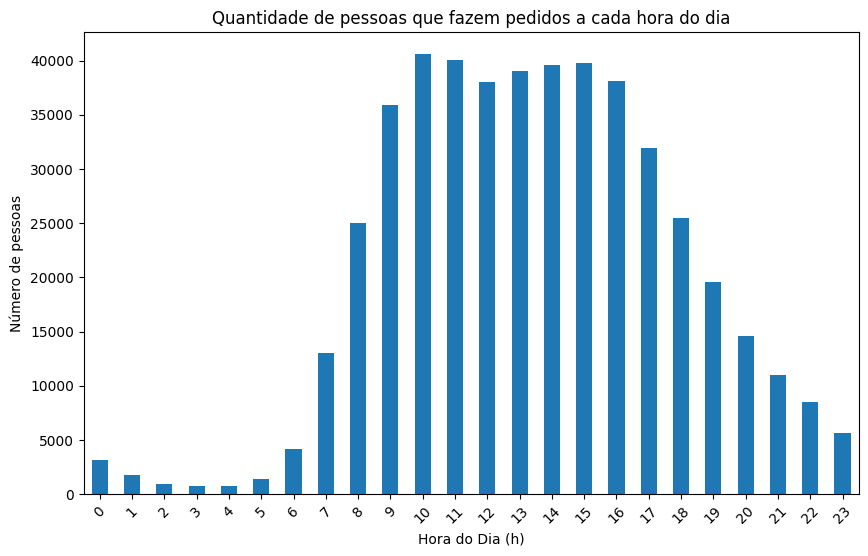

In [63]:
#2.Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
from matplotlib import pyplot as plt
df_agrupado = df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

df_agrupado.plot(x='order_hour_of_day', y='user_id', kind='bar', title='Quantidade de pessoas que fazem pedidos a cada hora do dia', xlabel='Hora do Dia (h)', ylabel='Número de pessoas', rot=45, figsize=(10, 6))
plt.show()


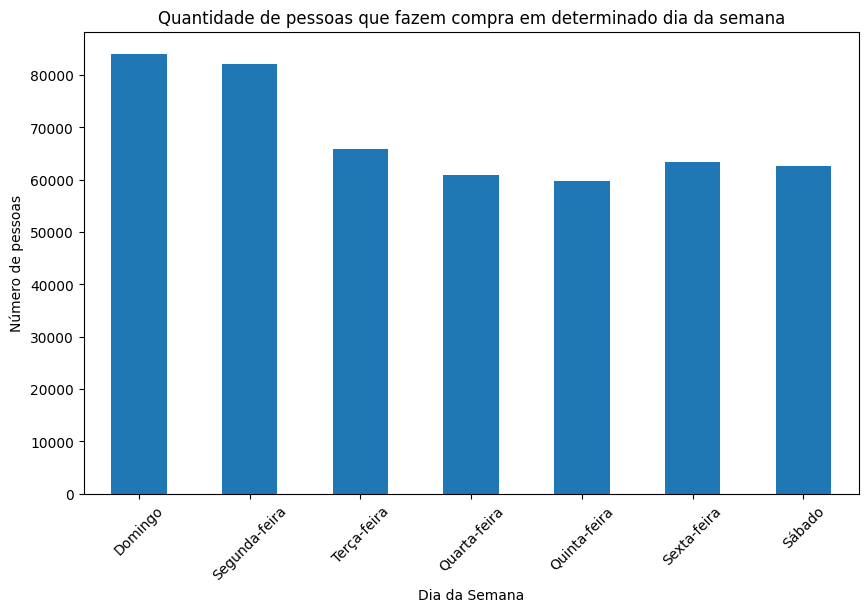

In [64]:

#3.Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
from matplotlib import pyplot as plt
diadasemana_compras = df_instacart_orders['order_dow'].value_counts().sort_index()
new_index = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
diadasemana_compras.index = new_index



diadasemana_compras.plot(x='order_dow', y='user_id', kind='bar', 
                            title='Quantidade de pessoas que fazem compra em determinado dia da semana', 
                            xlabel='Dia da Semana',
                            ylabel='Número de pessoas',
                            
                            rot=45, figsize=(10, 6))

plt.show()


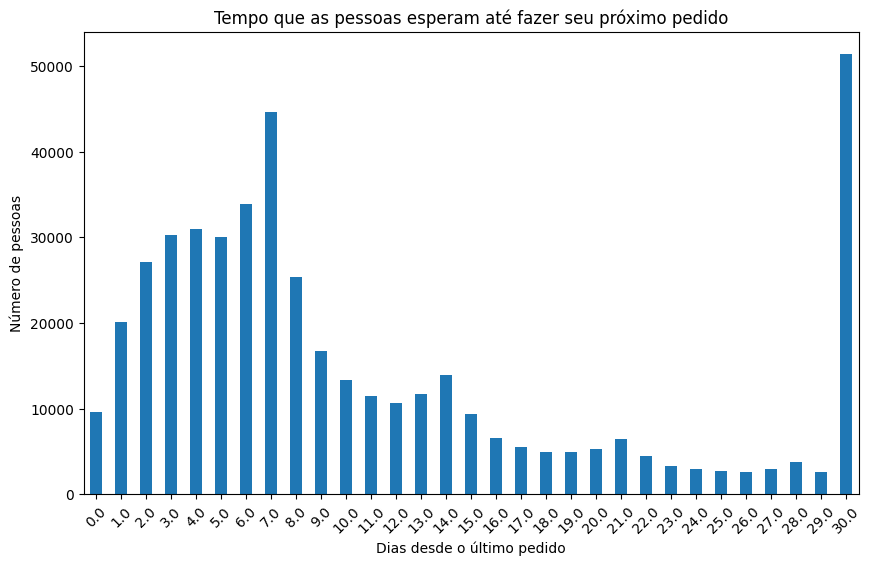

In [65]:

#4.Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.
from matplotlib import pyplot as plt
time_nextorder = df_instacart_orders['days_since_prior_order'].value_counts().sort_index()

time_nextorder.plot(x='days_since_prior_order', y='user_id', kind='bar',
                            title='Tempo que as pessoas esperam até fazer seu próximo pedido', 
                            xlabel='Dias desde o último pedido',
                            ylabel='Número de pessoas',
                            
                            rot=45, figsize=(10, 6))

plt.show()


Pode-se observar que aproximadamente 50000 demoram 30 dias ou mais para recomprar um produto, enquanto uma menor quantidade de pessoas esperam para comprar após 25 e 26 dias desde o último pedido. Veja que há poucos clientes também que recompram no mesmo dia "dia 0", aproximadamente 1000 clientes.

### [A1] Verifique se os valores fazem sentido

Sim, os valores fazem sentido, eles mostram padrões coerentes com o comportamento de consumo para a Instacart

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

Entre 9h e 16h é a faixa que maior parte dos pedidos ocorrem, com pico entre 10h e 14h. Observa-se que o número de pedidos é muito baixo entre 0h e 6h, o que faz sentido, afinal presume-se que a maioria dos consumidores então dormindo neste horário. Pode-se concluir que os clientes preferem comprar em horário comercial, principalemnte no final da manhã e início da tarde, quando estão mais disponíveis para pesquisar e realizar a compra.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

Domingo e segunda-feira as pessoas compram mais produtos alimentícios, ou seja, as pessoas realizam suas compras no início da semana, provavelmente para reabastecer o estoque após o fim de semana.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Entre 4 e 7 dias após o pedido anterior é onde a maioria dos clientes fazem um novo pedido. Poucas pessoas fazem pedidos no mesmo dia "dia 0", o que é mais difícil de acontecer, seja porque a pessoa esqueceu de adicionar algo no carrinho ou uma recompra imediata.
Outro pico que podemos observar é no de 30 dias, o que indica que vários clientes fazem um outro pedido somente após 30 dias, então possivelmente possuem um período de abastecimento mais longo.

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

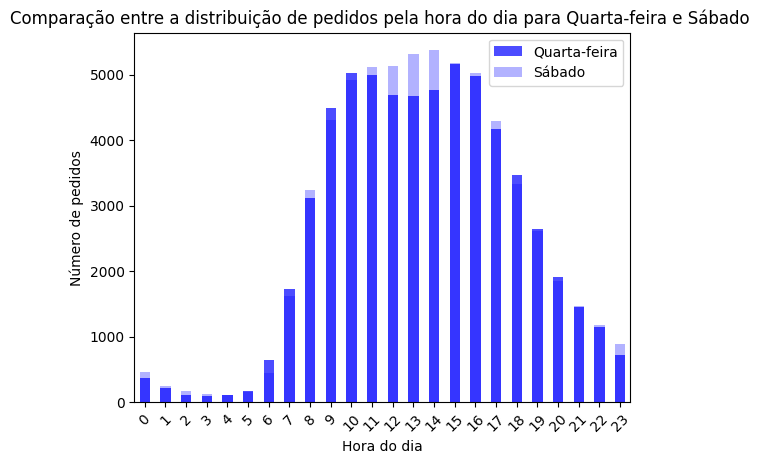

In [66]:
#1. Há alguma diferença nas distribuições de 'order_hour_of_day' nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
from matplotlib import pyplot as plt
quarta = df_instacart_orders[df_instacart_orders['order_dow']==3]
quarta_horadodia = quarta['order_hour_of_day'].value_counts().sort_index()
sabado = df_instacart_orders[df_instacart_orders['order_dow']==6]
sabado_horadodia = sabado['order_hour_of_day'].value_counts().sort_index()

quarta_horadodia.plot(x='order_hour_of_day', y='order_id', kind='bar', alpha=0.7, label='Quarta-feira', color='blue') 
sabado_horadodia.plot(x='order_hour_of_day', y='order_id', kind='bar', alpha=0.3, label='Sábado', rot=45, color='blue') 

plt.xlabel('Hora do dia')
plt.ylabel('Número de pedidos')
plt.title('Comparação entre a distribuição de pedidos pela hora do dia para Quarta-feira e Sábado ')
plt.legend()

plt.show()

Observando o gráfico acima, tanto na quarta quanto no sábado os pedidos se concentram entre as 10h e 16h, com pico às 15h para Quarta-feira e pico às 14h para Sábado.

### [B2] Qual é a distribuição do número de pedidos por cliente?

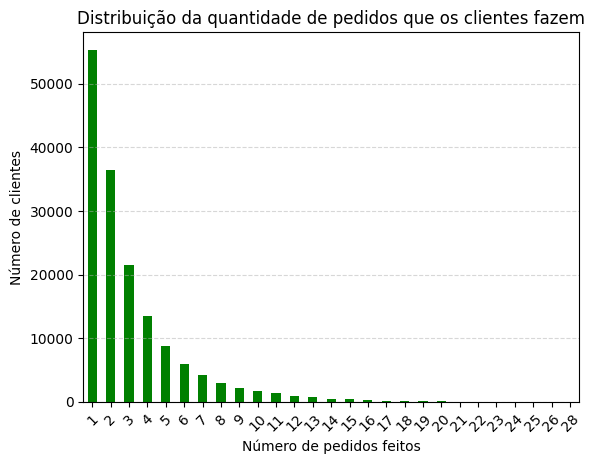

In [67]:
#2. Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
from matplotlib import pyplot as plt

orders_por_clientes = df_instacart_orders.groupby('user_id')['order_id'].count()
distribuicao_pedidos = orders_por_clientes.value_counts().sort_index()

distribuicao_pedidos.plot(kind='bar', title='Distribuição da quantidade de pedidos que os clientes fazem', rot=45, color='green', ylabel='Número de clientes', xlabel='Número de pedidos feitos')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

O gráfico mostra que a maioria dos clientes realiza apenas 1 ou 2 pedidos, enquanto o número de clientes diminui rapidamente conforme aumenta a quantidade de pedidos feitos. Pode-se concluir que a empresa Instacart deve elaborar estratégias de negócios para aumentar a retenção dos clientes, e assim, aumentar o número de pedidos para os clientes que já compraram na empresa.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [68]:
#3. Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes

produtos_frequentes = df_order_products['product_id'].value_counts().head(20)
#passando para um dataframe:
produtos_frequentes = produtos_frequentes.reset_index()
produtos_frequentes.columns = ['product_id', 'quantidade_total_comprada']

#preciso fazer um .merge com df_products para pegar o nome dos produtos
uniao_tabelas = produtos_frequentes.merge(df_products, how='left', on='product_id')
uniao_tabelas = uniao_tabelas.drop(['aisle_id', 'department_id'], axis=1)
print(uniao_tabelas)

    product_id  quantidade_total_comprada              product_name
0        24852                      66050                    banana
1        13176                      53297    bag of organic bananas
2        21137                      37039      organic strawberries
3        21903                      33971      organic baby spinach
4        47209                      29773      organic hass avocado
5        47766                      24689           organic avocado
6        47626                      21495               large lemon
7        16797                      20018              strawberries
8        26209                      19690                     limes
9        27845                      19600        organic whole milk
10       27966                      19197       organic raspberries
11       22935                      15898      organic yellow onion
12       24964                      15292            organic garlic
13       45007                      14584       

Os Top 3 produtos mais comprados respectivamente são "banana", "bag of organic bananas" e "organic strawberries". Observando o Top 20 produtos mais comprados, pode observar que são frutas e vegetais frescos, que são alimentos de alta rotatividade (devido a vida útil do produto) relacionados com a saudabilidade.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [69]:

df_agrupado = df_order_products.groupby('order_id')['product_id'].count().sort_index()
max_itens_pedido = df_agrupado.max()
min_itens_pedido = df_agrupado.min()
print(max_itens_pedido, min_itens_pedido)

mediana_produtos_por_pedido = df_agrupado.median()
print(mediana_produtos_por_pedido)

127 1
8.0


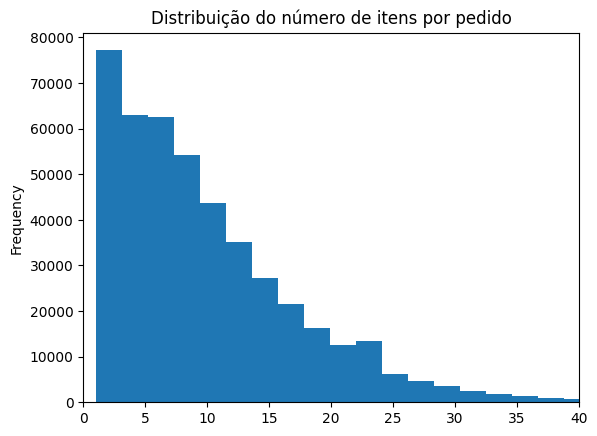

In [70]:

from matplotlib import pyplot as plt
df_agrupado.plot(kind='hist', title='Distribuição do número de itens por pedido', bins=60, xlim=[0,40] )
plt.show()



Escreva suas conclusões aqui

As pessoas normalmente compram 8 itens por pedido, sendo que a maior parte dos pedidos contém cerca de 5 a 10 itens, com uma queda gradual na frequência conforme aumenta o número de itens/produtos nos pedidos. Logo temos uma distribuição assimétrica à direita, ou seja, poucos realizam compras grandes (acima de 25 itens)

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

    product_id  quantidade_incluida_pedidorepetido              product_name
0        24852                               55763                    banana
1        13176                               44450    bag of organic bananas
2        21137                               28639      organic strawberries
3        21903                               26233      organic baby spinach
4        47209                               23629      organic hass avocado
5        47766                               18743           organic avocado
6        27845                               16251        organic whole milk
7        47626                               15044               large lemon
8        27966                               14748       organic raspberries
9        16797                               13945              strawberries
10       26209                               13327                     limes
11       22935                               11145      organic yellow onion

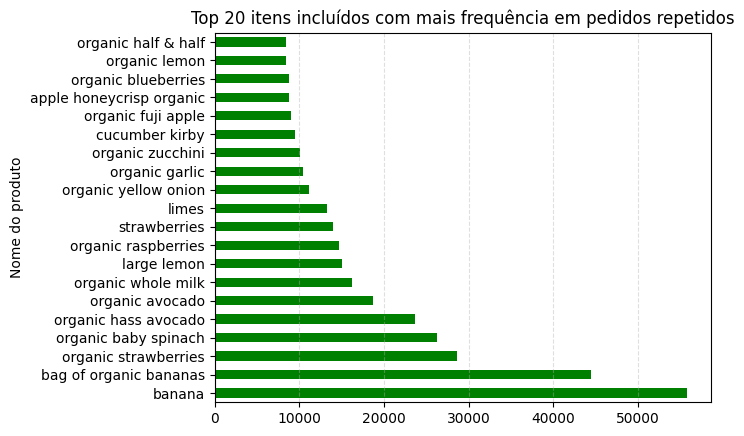

In [71]:
df_products_repetidos = df_order_products[df_order_products['reordered']==1]
products_repetidos = df_products_repetidos['product_id'].value_counts().reset_index().head(20)

products_repetidos.columns = ['product_id', 'quantidade_incluida_pedidorepetido']

uniao_df = products_repetidos.merge(df_products, on='product_id', how='left')

print(uniao_df.drop(['aisle_id', 'department_id'], axis='columns'))  #removi as colunas que não queria

#irei fazer um gráfico para visualizar

from matplotlib import pyplot as plt
uniao_df.plot(kind='barh', title='Top 20 itens incluídos com mais frequência em pedidos repetidos', x='product_name', y='quantidade_incluida_pedidorepetido',
              color='green', xlabel='Nome do produto', ylabel='Quantidade incluída em pedido repetido', legend=False)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()



Pode-se observar que os itens que foram mais incluídos em pedidos repetidos são em sua maioria frutas, legumes e outros alimentos orgânicos. A banana foi o alimento incluído com uma frequência maior. Isso mostra também que esses 20 itens são aqueles que os clientes apresentam uma maior recorrência de compra.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [72]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [73]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


In [74]:
df_repetidos = df_order_products.groupby('product_id')['reordered'].count()
df_repetidos.head()

product_id
1    280
2     11
3     42
4     49
7      2
Name: reordered, dtype: int64

In [75]:



#ele quer para cada produto, qual a divisão de todos os pedidos dele que são repetidos.
#se somar os valores reordered, terá o número de vezes que o produto foi recomprado
##ex. soma dos "reordered" de um produto foi 3, então ele foi recomprado outras 3 vezes em pedidos diferentes
#sum() em product_id irá contar quantos produtos são reorders
#.count() irá contar quantos pedidos totais tem o produto
df_solicitado = df_order_products.groupby('product_id')['reordered'].agg(['sum', 'count']).reset_index()

#agora preciso criarr uma coluna para dividir todos os pedidos de um produto que são repetidos:
df_solicitado['porcentagem_recompra_%'] = (df_solicitado['sum']/df_solicitado['count'])*100
df_solicitado.head()
#para saber o produto, preciso fazer um merge com o df_products
juncao_df=df_solicitado.merge(df_products, on='product_id', how='left')
print(juncao_df.drop(['aisle_id','department_id'], axis='columns'))



       product_id  sum  count  porcentagem_recompra_%  \
0               1  158    280               56.428571   
1               2    0     11                0.000000   
2               3   31     42               73.809524   
3               4   25     49               51.020408   
4               7    1      2               50.000000   
...           ...  ...    ...                     ...   
45568       49690    4      5               80.000000   
45569       49691   31     72               43.055556   
45570       49692    5     12               41.666667   
45571       49693   11     25               44.000000   
45572       49694    3      9               33.333333   

                                            product_name  
0                             chocolate sandwich cookies  
1                                       all-seasons salt  
2                   robust golden unsweetened oolong tea  
3      smart ones classic favorites mini rigatoni wit...  
4                   

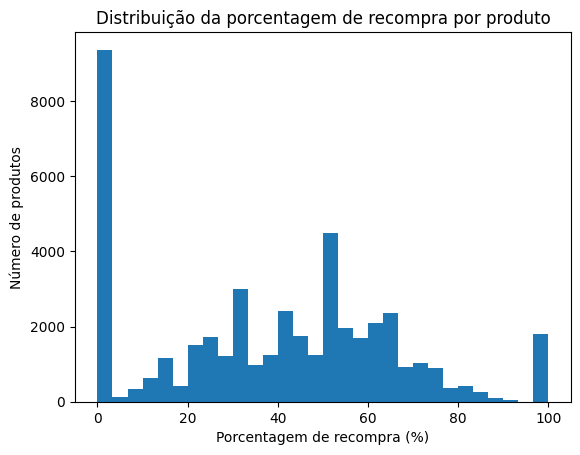

In [94]:
import matplotlib.pyplot as plt

plt.hist(juncao_df['porcentagem_recompra_%'], bins=30)
plt.title('Distribuição da porcentagem de recompra por produto')
plt.xlabel('Porcentagem de recompra (%)')
plt.ylabel('Número de produtos')
plt.show()

A maioria dos produtos apresenta baixa taxa de recompra, indicando que muitos itens são comprados apenas uma vez.
Entretanto, existe uma faixa consistente de produtos com recompras moderadas, entre 30% e 60%.
Um pequeno grupo de produtos atinge 100% de recompra, aproximadamente 2000 produtos, mostrando que são itens mais fidelizados pelos clientes.

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [80]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [81]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [92]:
#os produtos repetidos apresentam o reordered 1.
#ele quer saber a proporção de pedidos que são repetidos, ou seja, a divisão dos repetidos sobre todos os pedidos por cliente.
##se somar os valores reordered, terá o número de vezes que o produto foi recomprado
##ex. soma dos "reordered" de um produto foi 3, então ele foi recomprado outras 3 vezes em pedidos diferentes
#Podemos fazer um sum() em product_id irá contar quantos produtos são reorders
#.count() irá contar quantos pedidos totais tem o produto

#vamos fazer um merge para associar o df_order_products com o df_insta_cart_orders, para pegar o user_id do segundo df.
df_merged = df_order_products.merge(df_instacart_orders[['order_id', 'user_id']], on='order_id', how='left')


df_fracionado = df_merged.groupby('user_id')['reordered'].agg(['sum', 'count']).reset_index()

#agora preciso criarr uma coluna para dividir todos os pedidos de um produto que são repetidos:
df_fracionado['proporcao_pedidos_repetidos_%'] = (df_fracionado['sum']/df_fracionado['count'])*100
df_fracionado.columns = ['user_id', 'quantidade_repetidos', 'quantidadetotal_pedidos', 'proporcao_pedidos_repetidos_%']
df_fracionado.head()


,user_id,quantidade_repetidos,quantidadetotal_pedidos,proporcao_pedidos_repetidos_%
0,2,1,26,3.846154
1,4,0,2,0.000000
2,5,8,12,66.666667
3,6,0,4,0.000000
4,7,13,14,92.857143


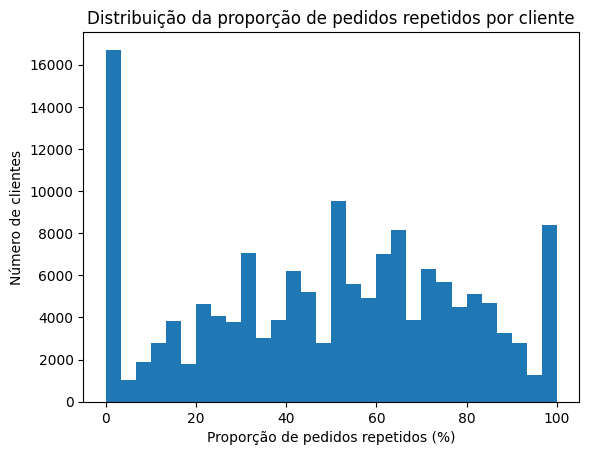

In [93]:
import matplotlib.pyplot as plt

plt.hist(df_fracionado['proporcao_pedidos_repetidos_%'], bins=30)
plt.title('Distribuição da proporção de pedidos repetidos por cliente')
plt.xlabel('Proporção de pedidos repetidos (%)')
plt.ylabel('Número de clientes')
plt.show()

Pode-se observar um pico maior próximo de 0%, logo no início do gráfico, indicando que muito clientes fazem poucas ou nenhuma recompra.
Um grupo que representa cerca de 8000 clientes representa a nossa faixa de clientes de recompra total.
Pode-se visualizar que há uma faixa consistente de consumidores com recompra moderada.

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [96]:
df_order_products.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1


In [95]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


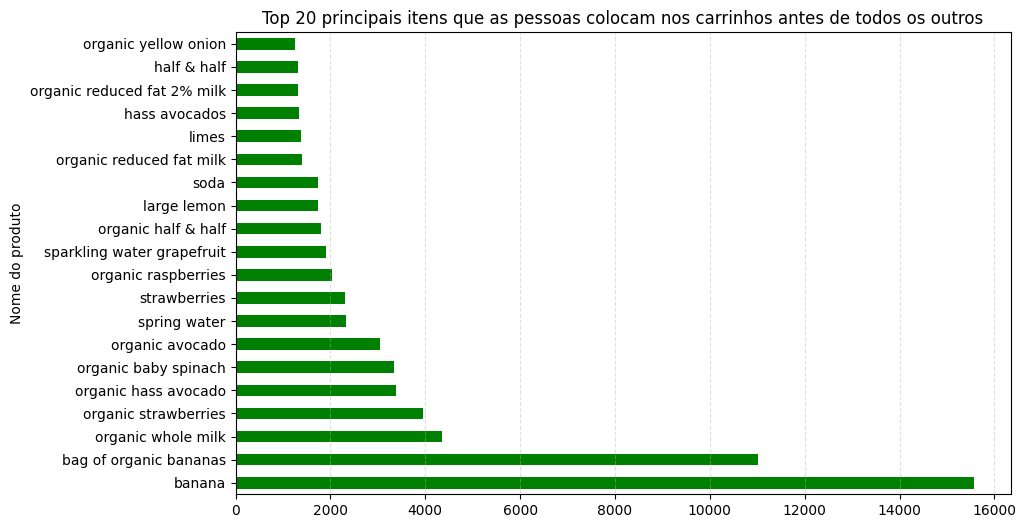

In [118]:

# 'add_to_cart_order': é a ordem sequencial em que cada item foi colocado no carrinho
    #1 -> foi o primeiro item adicionado
    #2 -> foi o segundo item adicionado
#vamos fazer um merge para associar o df_order_products com o df_products, para pegar o product_id e o product_name do segundo df.
df_merged = df_order_products.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
df_merged = df_merged.drop(['reordered'], axis=1)

#queremos saber quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros
#Podemos filtrar os produtos que foram o primeiro item no carrinho:
df_fracionado = df_merged[df_merged['add_to_cart_order']==1]

#quantas vezes o produto foi o primeiro a ser adicionado no carrinho?
top20_produto_df = df_fracionado['product_name'].value_counts().head(20)
top20_produto_df.head(20)

#fazendo o gráfico (de barras é mais ideal)
from matplotlib import pyplot as plt
top20_produto_df.plot(kind='barh', title='Top 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros',
              color='green', legend=False, figsize=[10,6], xlabel='Nome do produto', ylabel='Quantidade')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Parabéns pelo esforço em realizar as tarefas difíceis!
</div>

Os produtos que foram mais vezes adicionados primeiro ao carrinho foi a "banana" e o "saco de bananas orgânicas", isso indica que os consumidores tendem a adicionar primeiro no carrinho produtos orgânicos de consumo diário no carrinho. Itens frescos e orgânicos como o leite, o morango e o abacate aparecem também entre os mais prioritários, reforçando hábitos de compra focados em alimentos saudáveis.

# Conclusão geral do projeto:

O projeto envolveu três etapas principais: limpeza, preparação e análise exploratória dos dados. Foi necessário corrigir separadores, remover duplicados e preencher valores ausentes para garantir a integridade das informações. 
Na Parte A, analisou-se o comportamento geral dos pedidos, mostrando que as compras ocorrem principalmente entre 10h e 14h e nos primeiros dias da semana (como domingo e segunda-feira).
Na Parte B, investigou-se a frequência de pedidos e os produtos mais populares — destacando frutas e vegetais frescos, como bananas e abacates, entre os itens mais comprados.
Já na Parte C, foram explorados padrões mais complexos, revelando que poucos clientes realizam muitas recompras e que itens essenciais são frequentemente os primeiros adicionados ao carrinho.
Esses resultados indicam hábitos de compra consistentes e fornecem informações valiosos para estratégias de estoque, marketing e fidelização de clientes.